# Lab №2

## Выполнение

### 0. Импортируем необходимые библиотеки 

In [41]:
from math import pi
import numpy as np
import roboticstoolbox as rtb
import matplotlib.pyplot as plt
import spatialmath.base as sb

### 1. Импортируем модель (Stanford Manipulalor)

In [42]:
robot = rtb.models.DH.Stanford()
print(robot)

DHRobot: Stanford arm (by Victor Scheinman), 6 joints (RRPRRR), dynamics, standard DH parameters
┌────────┬───────┬────────┬────────┬─────────────────────┬────────┐
│   θⱼ   │  dⱼ   │   aⱼ   │   ⍺ⱼ   │         q⁻          │   q⁺   │
├────────┼───────┼────────┼────────┼─────────────────────┼────────┤
│  q1    │ 0.412 │      0 │ -90.0° │             -170.0° │ 170.0° │
│  q2    │ 0.154 │      0 │  90.0° │             -170.0° │ 170.0° │
│ -90.0° │    q3 │ 0.0203 │   0.0° │ 0.30479999999999996 │   1.27 │
│  q4    │     0 │      0 │ -90.0° │             -170.0° │ 170.0° │
│  q5    │     0 │      0 │  90.0° │              -90.0° │  90.0° │
│  q6    │     0 │      0 │   0.0° │             -170.0° │ 170.0° │
└────────┴───────┴────────┴────────┴─────────────────────┴────────┘

┌──┬──┐
└──┴──┘

┌──────┬─────┬─────┬────┬─────┬─────┬─────┐
│ name │ q0  │ q1  │ q2 │ q3  │ q4  │ q5  │
├──────┼─────┼─────┼────┼─────┼─────┼─────┤
│   qr │  0° │  0° │  0 │  0° │  0° │  0° │
│   qz │  0° │  0° │  0 │  0°

In [ ]:
# mass of each link
robot.links[0].m = 9.29
robot.links[1].m = 5.01
robot.links[2].m = 4.25
robot.links[3].m = 1.08
robot.links[4].m = 0.630
robot.links[5].m = 0.51

# the center of mass of each link
robot.links[0].r = [0, 0.0175, -0.1105]
robot.links[1].r = [0, -1.054, 0]
robot.links[2].r = [0, 0, -6.447]
robot.links[3].r = [0, 0.092, -0.054]
robot.links[4].r = [0, 0.566, 0.003]
robot.links[5].r = [0, 0, 1.554]

# the inertia tensor of each link
robot.links[0].I = [0.276, 0.255, 0.071, 0, 0, 0]
robot.links[1].I = [0.108, 0.018, 0.100, 0, 0, 0]
robot.links[2].I = [2.51, 2.51, 0.006, 0, 0, 0 ]
robot.links[3].I = [0.002, 0.001, 0.001, 0, 0, 0 ]
robot.links[4].I = [0.003, 0.0004, 0, 0, 0, 0]
robot.links[5].I = [0.013, 0.013, 0.0003, 0, 0, 0]

# the moment of inertia of the drive
robot.links[0].Jm = 0.953
robot.links[1].Jm = 2.193
robot.links[2].Jm = 0.782
robot.links[3].Jm = 0.106
robot.links[4].Jm = 0.097
robot.links[5].Jm = 0.020

# the coefficient of viscous friction of the drive
robot.links[0].B = 0.000
robot.links[1].B = 0.000
robot.links[2].B = 0.000
robot.links[3].B = 0.000
robot.links[4].B = 0.000
robot.links[5].B = 0.000

# the coefficient of Coulomb friction of the drive
robot.links[0].Tc = [0, 0]
robot.links[1].Tc = [0.0, 0]
robot.links[2].Tc = [0, 0]
robot.links[3].Tc = [0, 0]
robot.links[4].Tc = [0, 0]
robot.links[5].Tc = [0, 0]

# the gear ratio of each link
robot.links[0].G = 1
robot.links[1].G = 1
robot.links[2].G = 1
robot.links[3].G = 1
robot.links[4].G = 1
robot.links[5].G = 1

# restrictions on the generalized coordinates for each link
robot.links[0].qlim = [-2.967, 2.967]
robot.links[1].qlim = [-2.967, 2.967]
robot.links[2].qlim = [0.3048, 1.27] 
robot.links[3].qlim = [-2.967, 2.967]
robot.links[4].qlim = [-1.5708, 1.5708]
robot.links[5].qlim = [-2.967, 2.967]



### 2. Зададим начальное положение робота и построим его

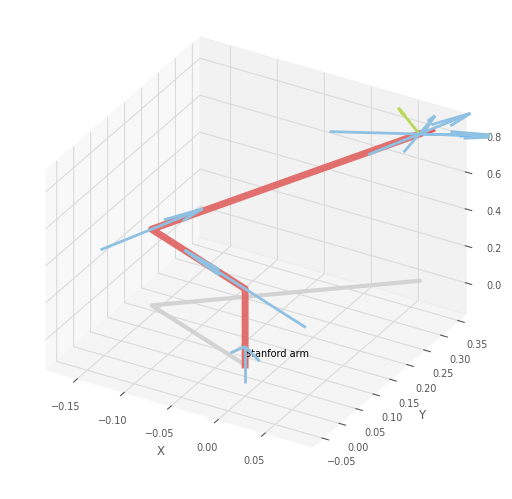

<Figure size 640x480 with 0 Axes>

In [44]:
q_start = [1, 0.7, 0.5, 0.6, 0.6, 1.3]
robot.plot(q_start)
plt.show()

### 3. Решим прямую задачу кинематики

In [45]:
T_start = robot.fkine(q_start)
print(T_start)

   0.02309  -0.5844    0.8112    0.06153   
   0.7057    0.5843    0.4008    0.3433    
  -0.7082    0.5632    0.4259    0.7944    
   0         0         0         1         



### 6. Построим рабочую зону манипулятора

Инициализируем переменные

In [46]:
n = 20  # Количество точек по каждой оси
i = 0  # Просто счетчик
move = [np.linspace(robot.links[i].qlim[0], robot.links[i].qlim[1], n) for i in range(3)]  # Записываем пределы перемещения для первых трех звеньев
pose = np.zeros([3,n**3])  # Создаем пустой массив для записи данных

Рассчитываем рабочую зону

In [47]:
# Проходимся перебором по каждой точке
for q1 in move[0]:
    for q2 in move[1]:
        for q3 in move[2]:
            Tt = robot.fkine([q1,q2,q3,0,0,0])  # Решаем ПЗК, меняя только первые 3 обобщенных координаты
            for j in range(3):
                pose[j][i] = Tt.t[j]  # Сохраняем точку
            i += 1

Строим рабочую зону

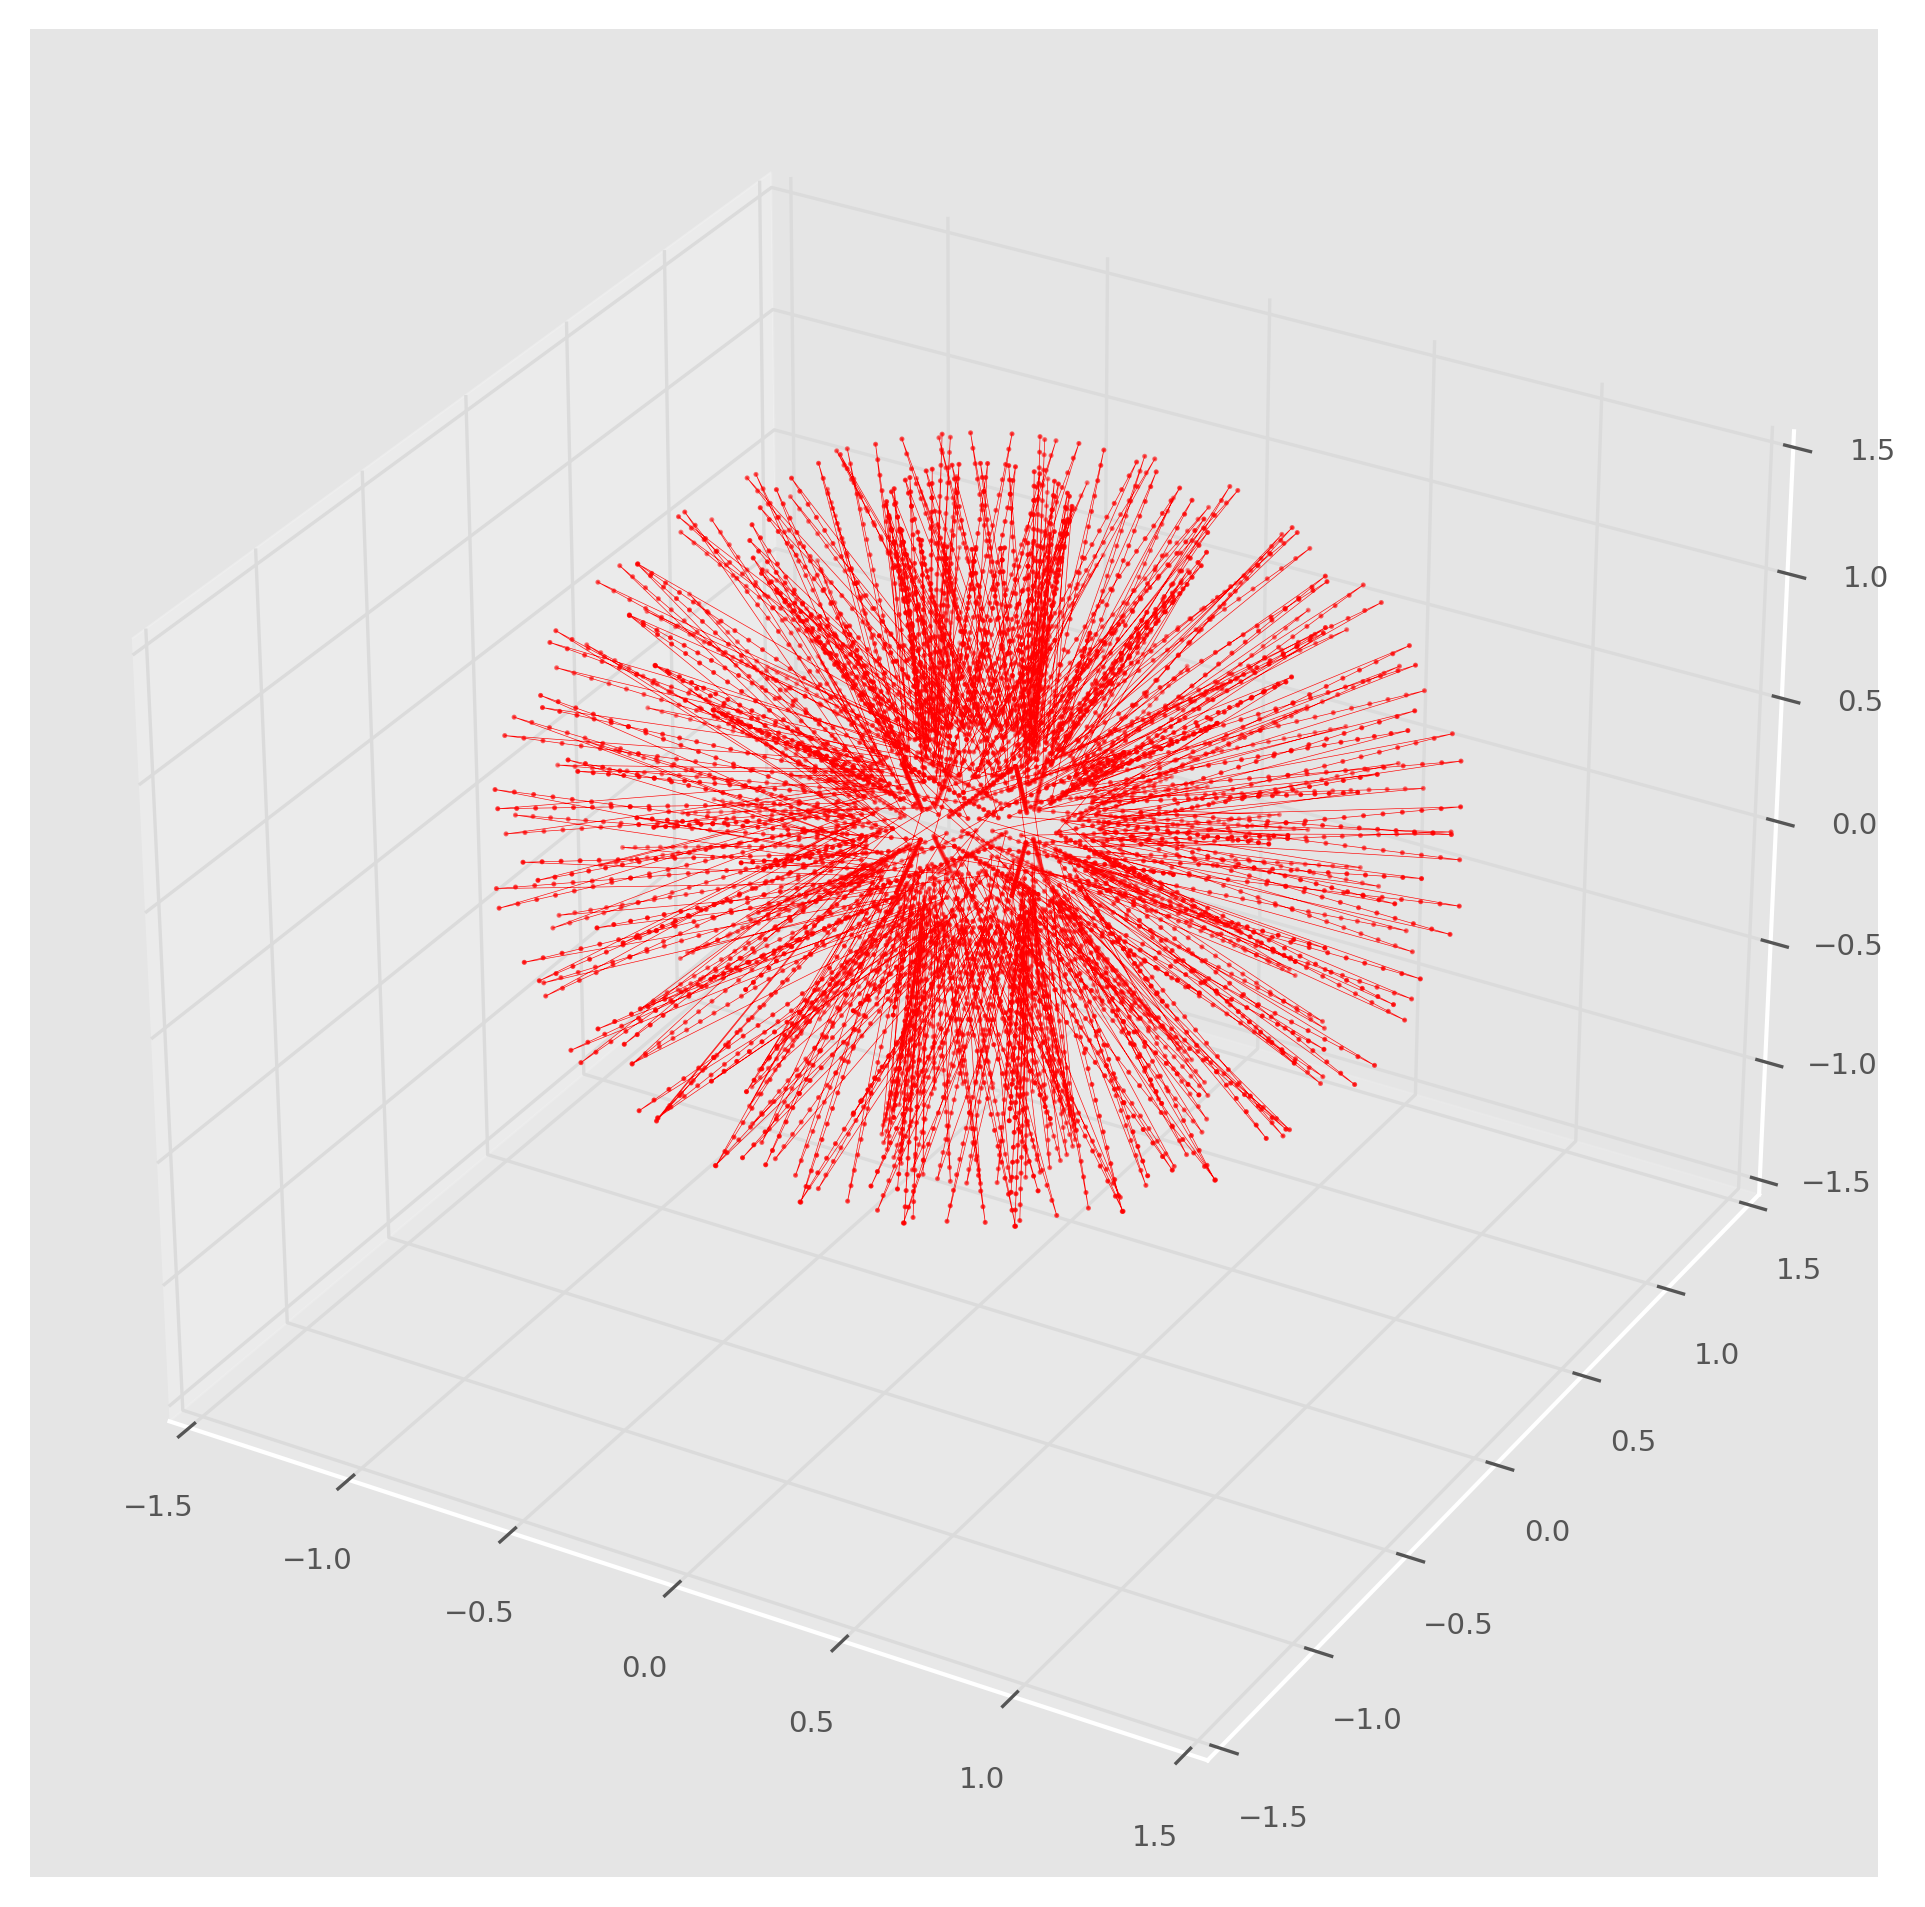

In [48]:
plt.figure(figsize=(8,8), dpi=300)
ax = plt.axes(projection="3d")
ax.plot3D(pose[0], pose[1], pose[2], color='red', linewidth=0.15)
ax.scatter3D(pose[0], pose[1], pose[2], s=0.5, color='red')
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.set_zlim(-1.5,1.5)
plt.show()

**We can notice** that the manipulator has a cylindrical plus spherical workspace because of the combination of revolute and prismatic joints: the first revolute joint allows the arm to sweep in a circular way around the base, the prismatic joint allows vertical motion, the second revolute joint allows further radial positioning and finally, the spherical wrist enables full orientation in space. the workspace has holes or singularities where the arm cannot reach due to mechanical limits or joint constraints.

### 7. Выберем конечную точку и проверим её (решим обратную задачу кинематики)

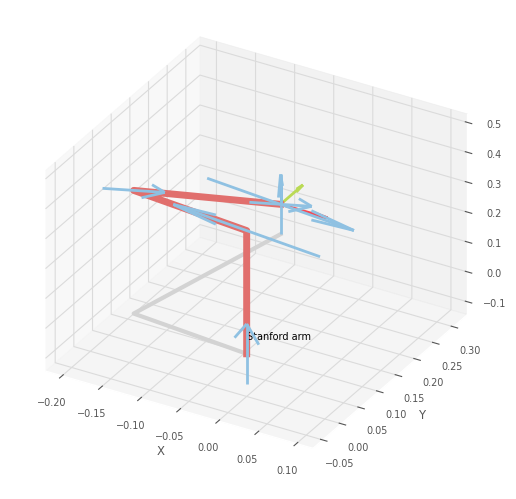

<Figure size 640x480 with 0 Axes>

In [49]:
point = [-0.1,0.3,0.1]
T_end = sb.transl(point)
q_end = robot.ikine_GN(T_end).q  # Есть другие методы, помимо ikine_GN
robot.plot(q_end)
plt.show()

**the plot shows** that the manipulator has reached toward the specific point in space, which confirms the inverse kinmatics solution works.

### 8. Спланируем траекторию

Спланируем траекторию методом 'jtraj' для $N$ = 100 точек

In [50]:
N = 100
t_start = 0
t_stop = 5
t_shag = t_stop/N
time = np.arange(t_start, t_stop, t_shag)

tr_jtraj = rtb.jtraj(q_start, q_end, time)

Спланируем ту же траекторию методом 'mtraj' с функцией 'trapezoidal'

In [51]:
tr_trap = rtb.mtraj(rtb.trapezoidal, q_start, q_end, time)

Спланируем ту же траекторию методом 'mtraj' с функцией 'quintic'

In [52]:
tr_quin = rtb.mtraj(rtb.quintic, q_start, q_end, time)

### 9. Построим графики

Построим графики положений для каждого звена

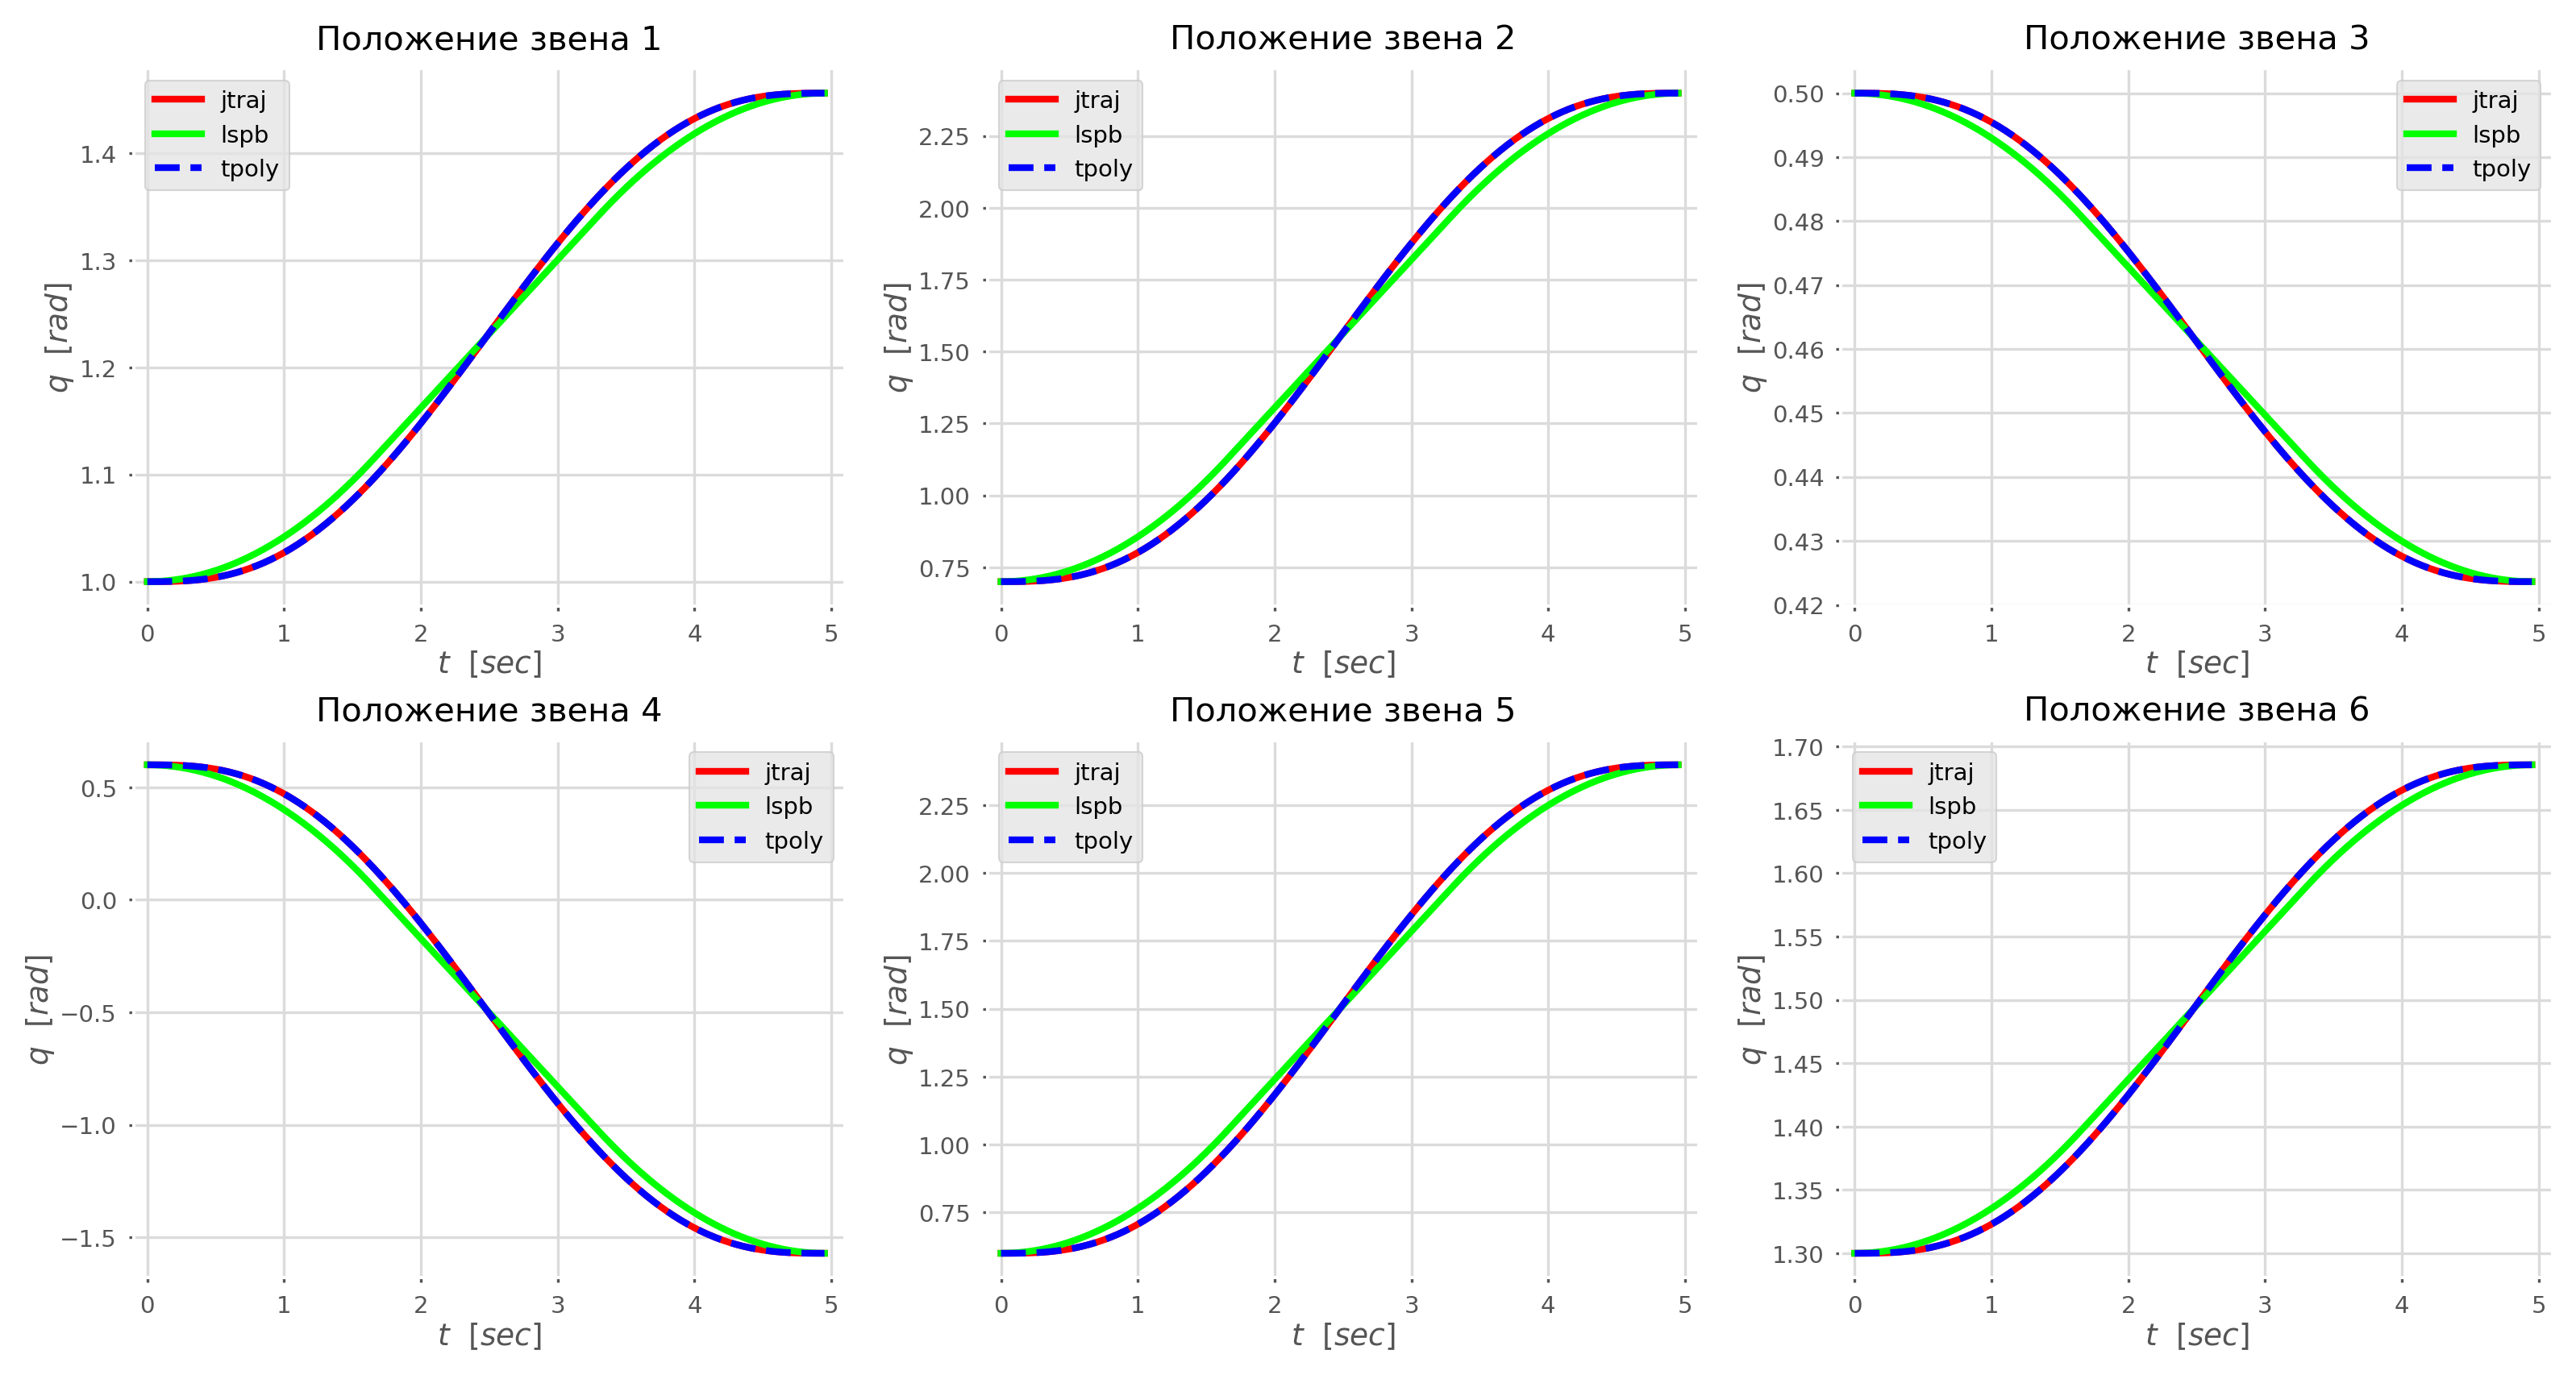

In [53]:
plt.figure(figsize=(10,5), dpi=300)  # Задаем размеры холста и плотность точек (четкость графика)
for g in range(1,7):
    plt.subplot(2,3,g)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.2, hspace=0.25)  # Задаем интервалы между графиками, чтоб не перекрывали друг друга
    traektoriya_jtraj = [tr_jtraj.q[i][g-1] for i in range(len(tr_jtraj.q))]  # Извлекаем нужные данные
    traektoriya_trap = [tr_trap.q[i][g-1] for i in range(len(tr_trap.q))]  # Извлекаем нужные данные
    traektoriya_quin = [tr_quin.q[i][g-1] for i in range(len(tr_quin.q))]  # Извлекаем нужные данные
    plt.plot(time, traektoriya_jtraj, linestyle='-', linewidth=2, color=(1,0,0), label=r"jtraj")  # Рисуем линию
    plt.plot(time, traektoriya_trap, linestyle='-', linewidth=2, color=(0,1,0), label=r"lspb")  # Рисуем линию
    plt.plot(time, traektoriya_quin, linestyle='--', linewidth=2, color=(0,0,1), label=r"tpoly")  # Рисуем линию
    plt.title(r"Положение звена {}".format(g), fontsize=10)  # Название графика
    plt.ylabel(r"$q$  [$rad$]", fontsize=9)  # Подпись оси Y
    plt.xlabel(r"$t$  [$sec$]", fontsize=9)  # Подпись оси X
    plt.grid(True)  # Добавить сетку
    plt.legend()  # Отобразить легенду (покажет то, что написано в 'label')
    ax = plt.gca()  # gca = get current axis - чтобы редактировать конкретную фигуру
    ax.set_facecolor((1,1,1))  # Цвет фона на графике
    ax.set_xlim([t_start-0.1,t_stop+0.1])  # Пределы по оси X
plt.show()

Построим графики скоростей для каждого звена

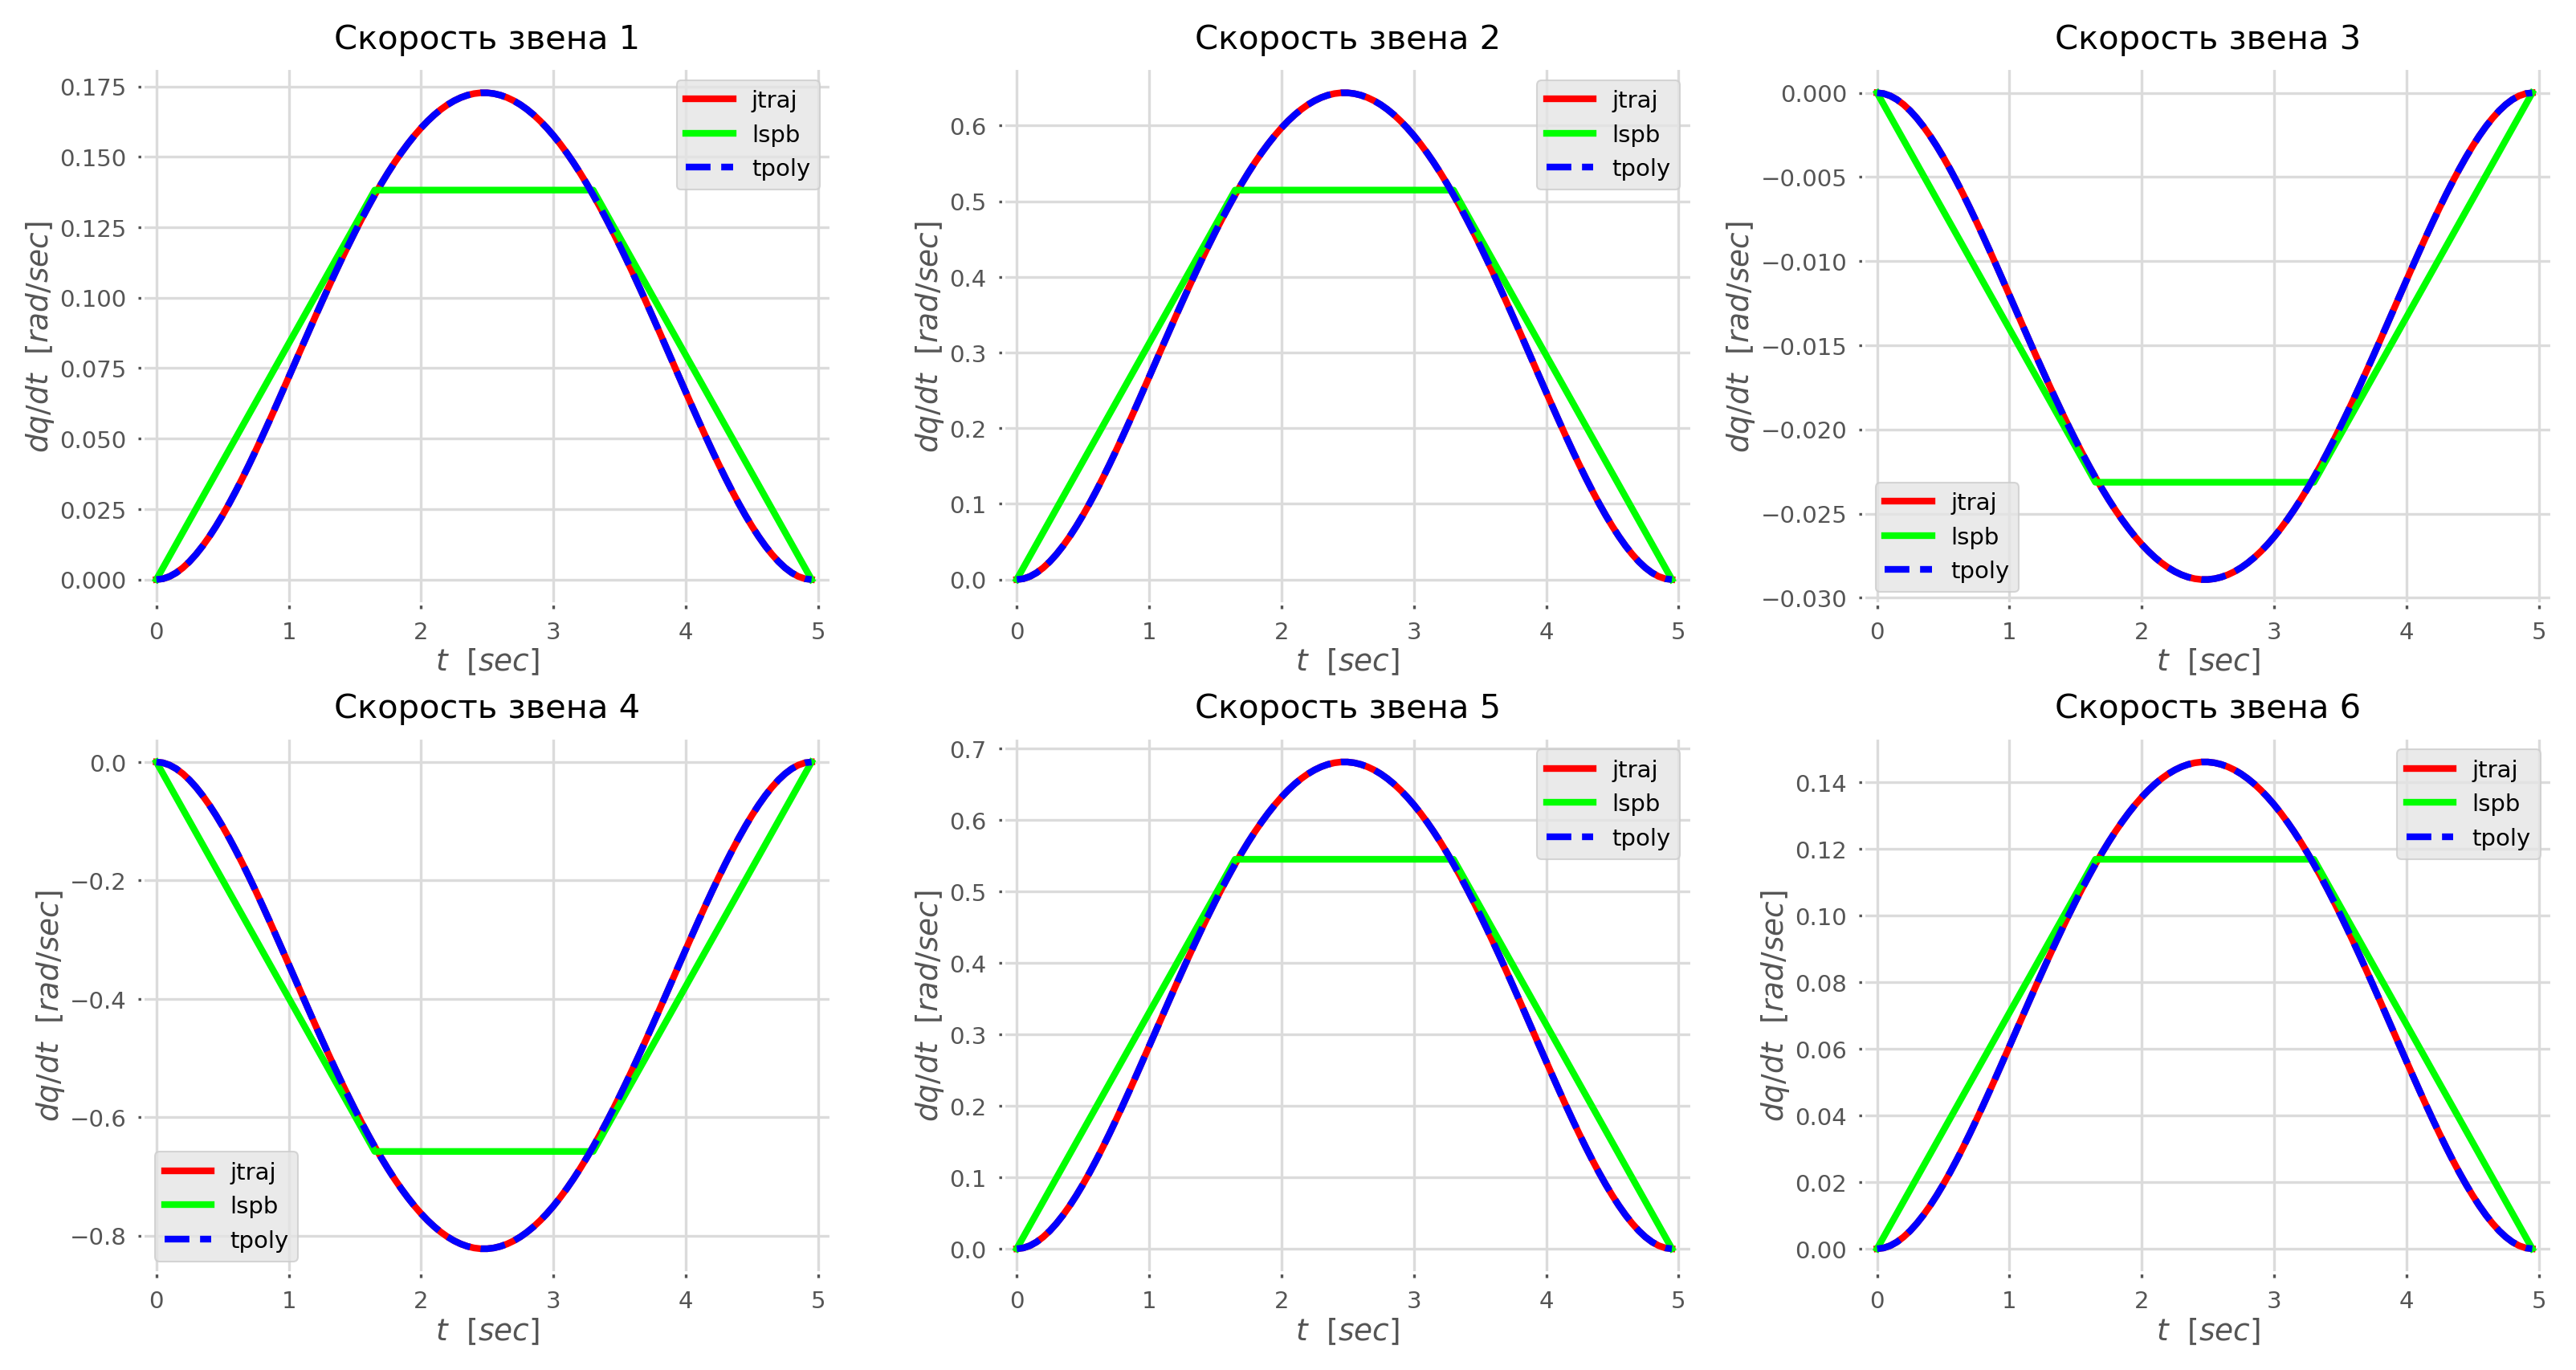

In [54]:
plt.figure(figsize=(10,5), dpi=300)  # Задаем размеры холста и плотность точек (четкость графика)
for g in range(1,7):
    plt.subplot(2,3,g)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.25, hspace=0.25)  # Задаем интервалы между графиками, чтоб не перекрывали друг друга
    traektoriya_jtraj = [tr_jtraj.qd[i][g-1] for i in range(len(tr_jtraj.qd))]  # Извлекаем нужные данные
    traektoriya_trap = [tr_trap.qd[i][g-1] for i in range(len(tr_trap.qd))]  # Извлекаем нужные данные
    traektoriya_quin = [tr_quin.qd[i][g-1] for i in range(len(tr_quin.qd))]  # Извлекаем нужные данные
    plt.plot(time, traektoriya_jtraj, linestyle='-', linewidth=2, color=(1,0,0), label=r"jtraj")  # Рисуем линию
    plt.plot(time, traektoriya_trap, linestyle='-', linewidth=2, color=(0,1,0), label=r"lspb")  # Рисуем линию
    plt.plot(time, traektoriya_quin, linestyle='--', linewidth=2, color=(0,0,1), label=r"tpoly")  # Рисуем линию
    plt.title(r"Скорость звена {}".format(g), fontsize=10)  # Название графика
    plt.ylabel(r"$dq/dt$  [$rad/sec$]", fontsize=9)  # Подпись оси Y
    plt.xlabel(r"$t$  [$sec$]", fontsize=9)  # Подпись оси X
    plt.grid(True)  # Добавить сетку
    plt.legend()  # Отобразить легенду (покажет то, что написано в 'label')
    ax = plt.gca()  # gca = get current axis - чтобы редактировать конкретную фигуру
    ax.set_facecolor((1,1,1))  # Цвет фона на графике
    ax.set_xlim([t_start-0.1,t_stop+0.1])  # Пределы по оси X
plt.show()

Построим графики ускорений для каждого звена

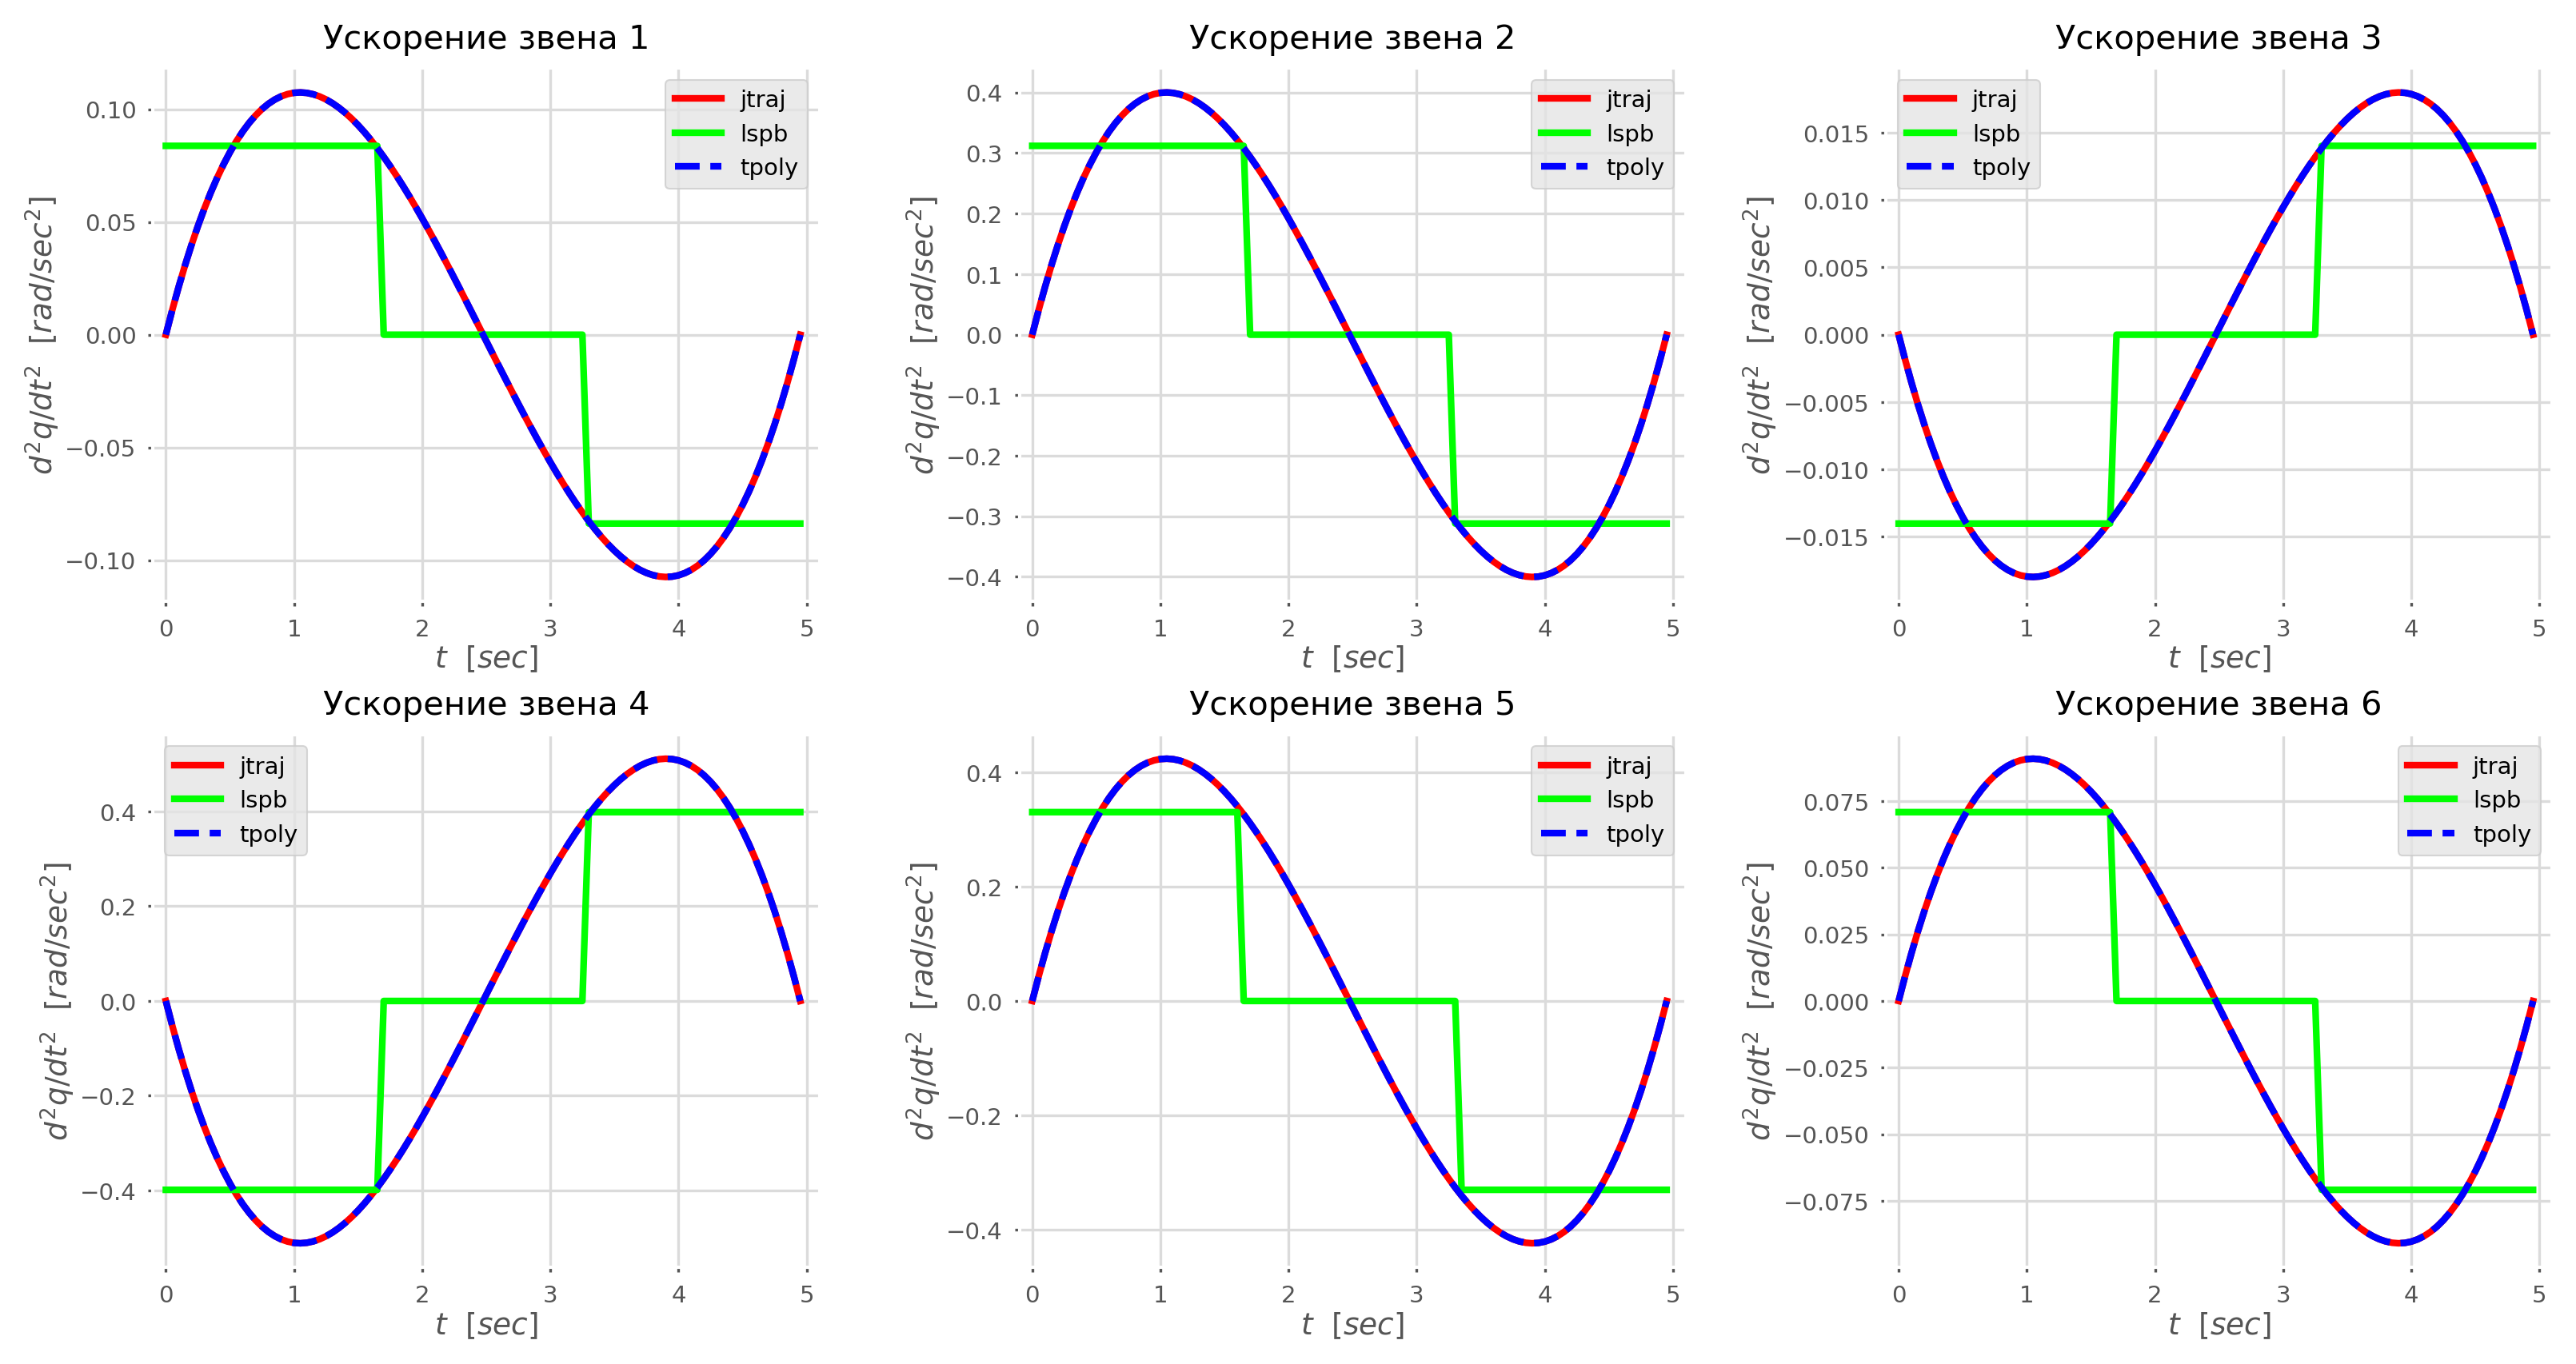

In [55]:
fig = plt.figure(figsize=(10,5), dpi=300)  # Задаем размеры холста и плотность точек (четкость графика)
for g in range(1,7):
    plt.subplot(2,3,g)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.3, hspace=0.25)  # Задаем интервалы между графиками, чтоб не перекрывали друг друга
    traektoriya_jtraj = [tr_jtraj.qdd[i][g-1] for i in range(len(tr_jtraj.qdd))]  # Извлекаем нужные данные
    traektoriya_trap = [tr_trap.qdd[i][g-1] for i in range(len(tr_trap.qdd))]  # Извлекаем нужные данные
    traektoriya_quin = [tr_quin.qdd[i][g-1] for i in range(len(tr_quin.qdd))]  # Извлекаем нужные данные
    plt.plot(time, traektoriya_jtraj, linestyle='-', linewidth=2, color=(1,0,0), label=r"jtraj")  # Рисуем линию
    plt.plot(time, traektoriya_trap, linestyle='-', linewidth=2, color=(0,1,0), label=r"lspb")  # Рисуем линию
    plt.plot(time, traektoriya_quin, linestyle='--', linewidth=2, color=(0,0,1), label=r"tpoly")  # Рисуем линию
    plt.title(r"Ускорение звена {}".format(g), fontsize=10)  # Название графика
    plt.ylabel(r"${d^2}q/d{t^2}$  [$rad/{sec}^2$]", fontsize=9)  # Подпись оси Y
    plt.xlabel(r"$t$  [$sec$]", fontsize=9)  # Подпись оси X
    plt.grid(True)  # Добавить сетку
    plt.legend()  # Отобразить легенду (покажет то, что написано в 'label')
    ax = plt.gca()  # gca = get current axis - чтобы редактировать конкретную фигуру
    ax.set_facecolor((1,1,1))  # Цвет фона на графике
    ax.set_xlim([t_start-0.1,t_stop+0.1])  # Пределы по оси X
plt.show()

### Results 

**joint position** 
All three trajectory generation methods (jtraj, lspb, tpoly) produce very similar position profiles for each joint. and most joints move smoothly from the initial to the final position without oscillation. The lspb trajectory (green plot) has very slight deviations in transitions compared to jtraj and tpoly.

**joint velocity**
For jtraj and tpoly, the velocity profiles are continuous, smooth, and follow the expected bell shape. For the lspb method, the velocity profiles contain flat segments or constant velocity. Peak velocity varies per joint, reflecting different joint lengths and ranges of motion.

**joint acceleration**
jtraj and tpoly generates smooth, continuous acceleration profiles resembling sinusoidal shapes. while lspb characteristic constant acceleration steps, reflecting the flat regions when constant velocity phase and and sudden jumps in acceleration at segment transitions.
